## Import LIBs

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Read DATA

In [6]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Advertising.csv")

In [8]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
df.drop(['Unnamed: 0'],axis = 1 , inplace = True)

In [20]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [22]:
df['Total'] = df['TV']+ df['Radio']+df['Newspaper']+ df['Sales']

In [24]:
df.head()

,TV,Radio,Newspaper,Sales,Total
0,230.1,37.8,69.2,22.1,359.2
1,44.5,39.3,45.1,10.4,139.3
2,17.2,45.9,69.3,9.3,141.7
3,151.5,41.3,58.5,18.5,269.8
4,180.8,10.8,58.4,12.9,262.9


## VIS

<Axes: xlabel='Total', ylabel='Sales'>

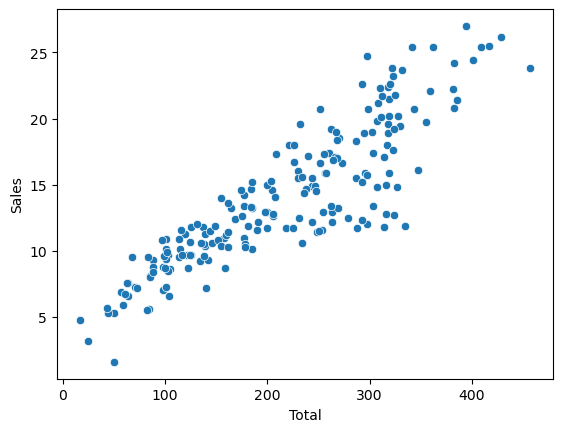

In [27]:
sns.scatterplot(x= 'Total',y='Sales',data=df)

<Axes: xlabel='Total', ylabel='Sales'>

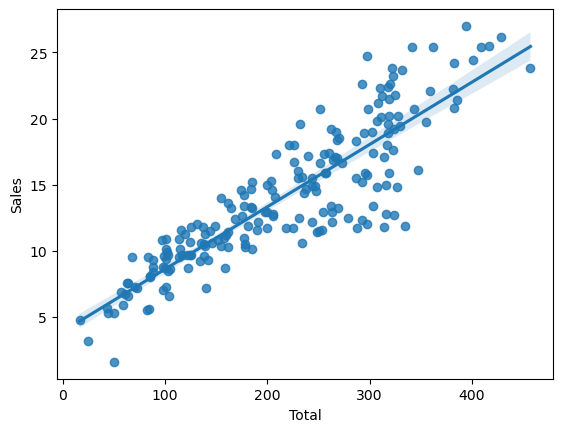

In [29]:
sns.regplot(x= 'Total',y='Sales',data=df)

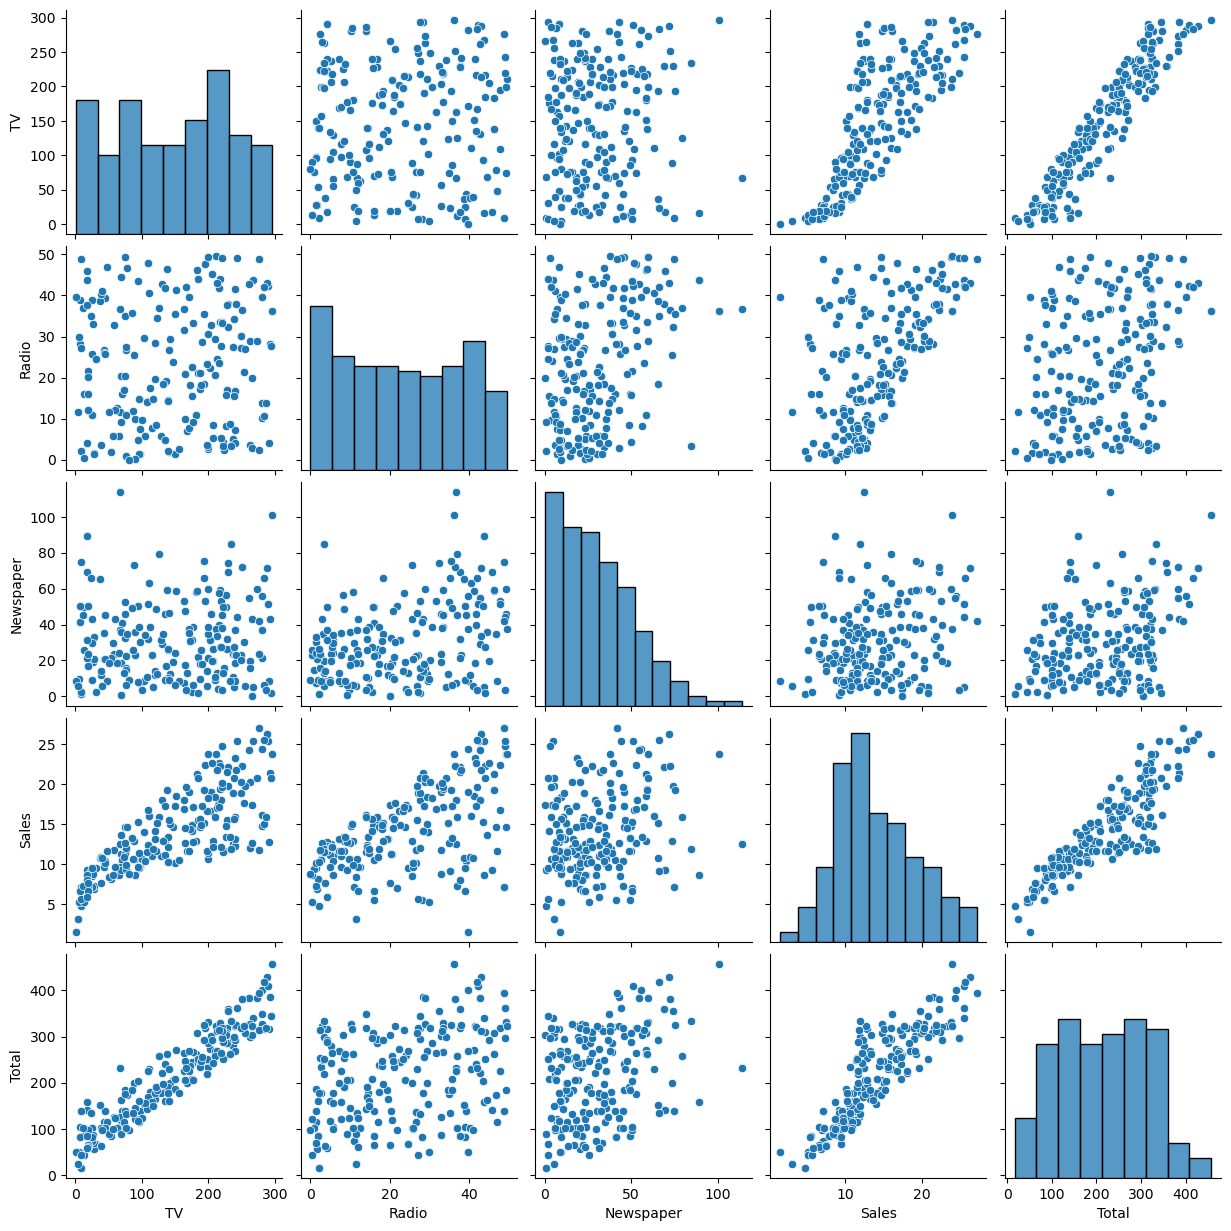

In [31]:
sns.pairplot(df)

## Data Preprocessing

In [38]:
np.max(df)

457.40000000000003

In [40]:
df.describe()

,TV,Radio,Newspaper,Sales,Total
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500,214.883000
std,85.854236,14.846809,21.778621,5.217457,97.546913
min,0.700000,0.000000,0.300000,1.600000,16.500000
25%,74.375000,9.975000,12.750000,10.375000,133.450000
50%,149.750000,22.900000,25.750000,12.900000,222.850000
75%,218.825000,36.525000,45.100000,17.400000,297.825000
max,296.400000,49.600000,114.000000,27.000000,457.400000


In [42]:
df.max()

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
Total        457.4
dtype: float64

In [44]:
df.min()

TV            0.7
Radio         0.0
Newspaper     0.3
Sales         1.6
Total        16.5
dtype: float64

In [46]:
df.head()

,TV,Radio,Newspaper,Sales,Total
0,230.1,37.8,69.2,22.1,359.2
1,44.5,39.3,45.1,10.4,139.3
2,17.2,45.9,69.3,9.3,141.7
3,151.5,41.3,58.5,18.5,269.8
4,180.8,10.8,58.4,12.9,262.9


### split

In [48]:
x = df.drop(['Sales','Total'],axis = 1)
y= df['Sales']

In [55]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [57]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,shuffle= True)

In [66]:
x_train.head()

,TV,Radio,Newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [70]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('--'*20)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (160, 3)
y_train shape (160,)
----------------------------------------
x_test shape (40, 3)
y_test shape (40,)


## Model Building -- LinearRegression

In [75]:
from sklearn.linear_model import LinearRegression

In [77]:
# call 
lr_model = LinearRegression()

In [94]:
# train the model --> train data [x,y]
lr_model.fit(x_train,y_train)

LinearRegression()

In [96]:
# predict --> test data [x]
y_predict= lr_model.predict(x_test)

In [117]:
x_test.head()

,TV,Radio,Newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2


In [98]:
y_predict.shape

(40,)

In [100]:
y_predict

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [102]:
y_test

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: Sales, dtype: float64

## Preformance Measure

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [107]:
mean_absolute_error(y_test , y_predict)

1.361781350209027

In [109]:
mean_squared_error(y_test , y_predict)

4.402118291449682

In [111]:
np.sqrt(mean_squared_error(y_test , y_predict))

2.0981225634956795

In [115]:
lr_model.predict([[216,43.9,27]])

array([21.17616165])

In [113]:
x_train.head()

,TV,Radio,Newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
